In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures

#폰트 설정 (Windows 기본 폰트: 맑은 고딕)
plt.rcParams.update({
    "font.family": "Malgun Gothic",  # 윈도우 기본 한글 폰트
    "font.size": 10,
    "axes.unicode_minus": False,     # 마이너스 깨짐 방지
})


과제 1: Iris 다른 특성 조합
Sepal Width와 Petal Width의 관계 분석

→ 선형 회귀 모델 만들고 R² 비교하기

In [2]:
sns.load_dataset('iris')

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
iris = load_iris().data


In [4]:
iris

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris.shape

(150, 4)

In [6]:
iris[:,1]

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [7]:
# reshpae (-1) -> 그자체 크기를 말하는거나 같음 (-1,1) 하면 1차원->2차원
X = iris[:,1].reshape(-1,1) # sepal_width

In [8]:
X.shape

(150, 1)

In [9]:
X

array([[3.5],
       [3. ],
       [3.2],
       [3.1],
       [3.6],
       [3.9],
       [3.4],
       [3.4],
       [2.9],
       [3.1],
       [3.7],
       [3.4],
       [3. ],
       [3. ],
       [4. ],
       [4.4],
       [3.9],
       [3.5],
       [3.8],
       [3.8],
       [3.4],
       [3.7],
       [3.6],
       [3.3],
       [3.4],
       [3. ],
       [3.4],
       [3.5],
       [3.4],
       [3.2],
       [3.1],
       [3.4],
       [4.1],
       [4.2],
       [3.1],
       [3.2],
       [3.5],
       [3.6],
       [3. ],
       [3.4],
       [3.5],
       [2.3],
       [3.2],
       [3.5],
       [3.8],
       [3. ],
       [3.8],
       [3.2],
       [3.7],
       [3.3],
       [3.2],
       [3.2],
       [3.1],
       [2.3],
       [2.8],
       [2.8],
       [3.3],
       [2.4],
       [2.9],
       [2.7],
       [2. ],
       [3. ],
       [2.2],
       [2.9],
       [2.9],
       [3.1],
       [3. ],
       [2.7],
       [2.2],
       [2.5],
       [3.2],
      

In [10]:
X.flatten()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3. ,
       3. , 4. , 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3. ,
       3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3. ,
       3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2,
       3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2. , 3. , 2.2, 2.9, 2.9,
       3.1, 3. , 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8, 3. ,
       2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3. , 3.4, 3.1, 2.3, 3. , 2.5, 2.6,
       3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3. , 2.9,
       3. , 3. , 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. ,
       3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. ,
       2.8, 3.8, 2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
       3.2, 3.3, 3. , 2.5, 3. , 3.4, 3. ])

In [11]:
y = iris[:,3]     # 종속변수

In [12]:
y

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

<Axes: >

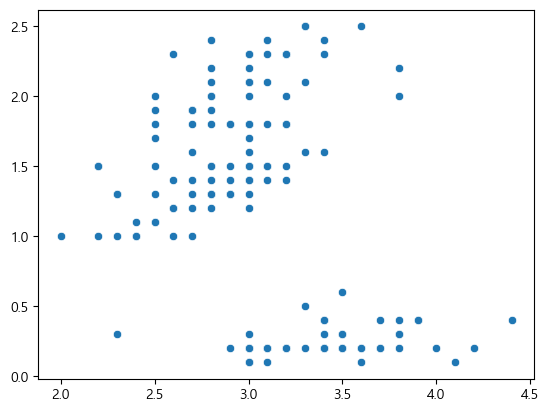

In [13]:
sns.scatterplot(x=X.flatten() ,y=y)

In [14]:
# Train: 80%, Test: 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train 세트: {len(X_train)}개")
print(f"Test 세트: {len(X_test)}개")

Train 세트: 120개
Test 세트: 30개


In [15]:
# 선형 회귀 모델 생성 y = a₁x₁ + a₂x₂ + ... + b 형태
model = LinearRegression()

# 학습! 실제로 데이터를 보고 a 와 b 값을 찾는 단계
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [16]:
# w와 b 확인
w = model.coef_[0] # 기울기
b = model.intercept_ # 절편

print(f" 학습 완료!")
print(f"가중치 w (기울기): {w:.3f}")
print(f"편향 b (절편): {b:.3f}")
print(f"찾은 식: y = {w:.3f}x + {b:.3f}")

 학습 완료!
가중치 w (기울기): -0.619
편향 b (절편): 3.078
찾은 식: y = -0.619x + 3.078


In [17]:
#예측 
y_pred = model.predict(X_test)

In [18]:
# MSE (Mean Squared Error) → 오차 제곱의 평균 (작을수록 좋음)
mse = mean_squared_error(y_test, y_pred) 

# R² (결정계수) → 모델이 데이터를 얼마나 설명하는가 (1에 가까울수록 좋음 0 또는 음수는 거의 관계없다.or 틀린방향 예측)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R2 Score:", r2)

MSE: 0.5617835897948079
R2 Score: 0.11621382856661178


| 구분        | MSE          | R² Score    |
| --------- | ------------ | ----------- |
| **의미**    | 오차 크기 자체     | 모델의 설명력 비율  |
| **좋은 방향** | 0에 가까울수록 좋음  | 1에 가까울수록 좋음 |
| **단위**    | y의 제곱 단위     | 단위 없음 (비율형) |
| **직관성**   | 오차 크기 감지에 유리 | 모델 비교에 유리   |


In [ ]:
'''
 R²: 0.11621382856661178

Sepal Width와 Petal Width 간의 선형 관계를 분석한 결과,
R² 값이 0.116으로 매우 낮게 나타나 두 특성 간에는 뚜렷한 상관관계가 없는 것으로 판단된다.

'''

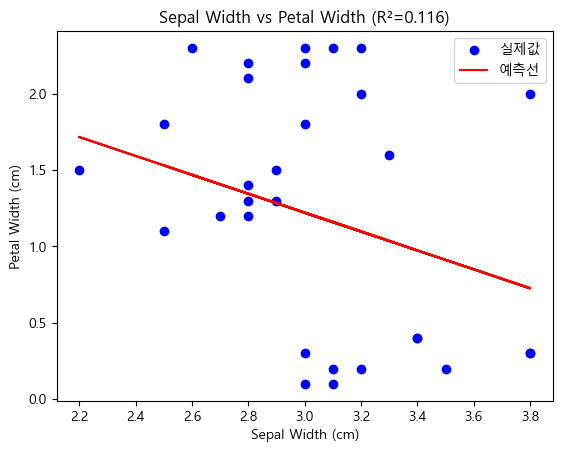

In [19]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='실제값')
plt.plot(X_test, y_pred, color='red', label='예측선')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Width (cm)')
plt.title(f'Sepal Width vs Petal Width (R²={r2:.3f})')
plt.legend()
plt.show()


과제 2: 당뇨병 데이터 특성 선택
BMI 예측에 가장 좋은 특성 조합 찾기

→ 2개, 3개, 5개 특성 조합 비교
r2스코어 가장 높은것찾기

In [22]:
df = pd.read_csv('train.csv')

In [23]:
df_t = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']].replace(0,pd.NA)
df_t.isnull().sum()

Glucose            4
BloodPressure     30
SkinThickness    195
Insulin          318
BMI                7
Age                0
dtype: int64

In [24]:
# 결측치 제거
df_t.dropna(inplace=True)
df_t.isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Age              0
dtype: int64

In [25]:
df_t.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
Glucose,1.000000,0.213390,0.214293,0.600479,0.212549,0.342942
BloodPressure,0.213390,1.000000,0.249560,0.088505,0.292520,0.301791
SkinThickness,0.214293,0.249560,1.000000,0.200479,0.632375,0.182784
Insulin,0.600479,0.088505,0.200479,1.000000,0.258074,0.196610
BMI,0.212549,0.292520,0.632375,0.258074,1.000000,0.078956
Age,0.342942,0.301791,0.182784,0.196610,0.078956,1.000000


In [26]:
# BMI를 제외한 나머지 변수들 → 입력값
X = df.drop("BMI", axis=1) 

# 예측 대상(BMI)
y = df["BMI"]

In [ ]:
# 사용할 특성
feature_pool = [
    "Pregnancies", "Glucose", "BloodPressure",
    "SkinThickness", "Insulin",
    "DiabetesPedigreeFunction", "Age"
]

In [ ]:
from itertools import combinations

# 조합별 결과를 담을 리스트
results = []

for k in [2, 3, 5]:  # 2개, 3개, 5개 조합
    for combo in combinations(feature_pool, k):
        X = df[list(combo)]
        X_train, X_test, y_train, y_test = train_test_split(
            # 80%는 학습용, 20%는 테스트용
            X, y, test_size=0.2, random_state=42
        )

        model = LinearRegression()          # 선형회귀 모델 생성
        model.fit(X_train, y_train)         # 모델 학습
        y_pred = model.predict(X_test)      # 테스트 데이터로 예측
        r2 = r2_score(y_test, y_pred)       # r2값 계산

        # 결과 저장
        results.append({
            "k": k,
            "features": combo,
            "r2": r2
        })


In [ ]:
# 보기 좋게 DataFrame으로 정리
results_df = pd.DataFrame(results)

2 features R² = 0.037
3 features R² = 0.066
5 features R² = 0.290


In [33]:

# k(특성 개수)별로 그룹화하여 R² 높은 순으로 정렬
grouped = results_df.sort_values(["k", "r2"], ascending=[True, False])

# 각 k별 상위 몇 개씩 출력 (예: 상위 5개)
for k in [2, 3, 5]:
    print(f"\n=== k = {k}개 특성 조합 (상위 5개) ===")
    display(grouped[grouped["k"] == k].head(5))


=== k = 2개 특성 조합 (상위 5개) ===


,k,features,r2
11,2,"(BloodPressure, SkinThickness)",0.292035
7,2,"(Glucose, SkinThickness)",0.252209
17,2,"(SkinThickness, Age)",0.243125
2,2,"(Pregnancies, SkinThickness)",0.231098
16,2,"(SkinThickness, DiabetesPedigreeFunction)",0.230242



=== k = 3개 특성 조합 (상위 5개) ===


,k,features,r2
36,3,"(Glucose, BloodPressure, SkinThickness)",0.302249
47,3,"(BloodPressure, SkinThickness, DiabetesPedigre...",0.296542
48,3,"(BloodPressure, SkinThickness, Age)",0.295150
46,3,"(BloodPressure, SkinThickness, Insulin)",0.294908
26,3,"(Pregnancies, BloodPressure, SkinThickness)",0.291979



=== k = 5개 특성 조합 (상위 5개) ===


,k,features,r2
57,5,"(Pregnancies, Glucose, BloodPressure, SkinThic...",0.302515
76,5,"(BloodPressure, SkinThickness, Insulin, Diabet...",0.301041
66,5,"(Pregnancies, BloodPressure, SkinThickness, In...",0.298968
73,5,"(Glucose, BloodPressure, SkinThickness, Diabet...",0.296465
56,5,"(Pregnancies, Glucose, BloodPressure, SkinThic...",0.296282


In [ ]:
'''
특성 조합을 늘릴수록 R²가 높아져 모델이 향상되었다.
하지만 전체적으로 R²이 낮아, 선형 모델만으로는 BMI를 충분히 예측하기 어렵다.

그나마 SkinThickness가 공통적으로 포함되며 BMI 예측에 가장 큰 기여를 했다.
BloodPressure와 Glucose를 함께 사용할 때 R²가 약 0.302로 최대였으나, 
5개 특성으로 늘려도 R²는 0.303 수준으로 개선폭이 작았다. s

따라서 단순 선형모델 관점에서 (Glucose, BloodPressure, SkinThickness) 조합이 가장 좋다.
'''

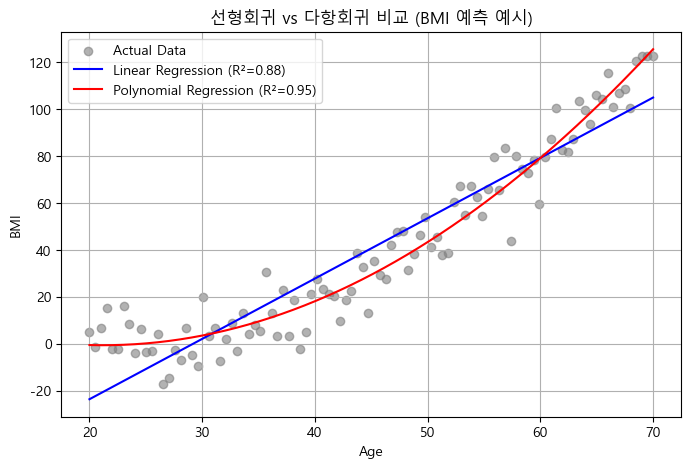

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# 예시용 데이터: Age로 BMI 예측 (단일 피처로 시각화 용이하게)
np.random.seed(42)
Age = np.linspace(20, 70, 100)
BMI = 20 + 0.05*Age**2 - 2*Age + np.random.normal(0, 10, 100)  # BMI가 곡선관계라고 가정

X = Age.reshape(-1, 1)
y = BMI

# 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# (1) 선형회귀 모델
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

# (2) 다항회귀 모델 (2차)
model_poly = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model_poly.fit(X_train, y_train)
y_pred_poly = model_poly.predict(X_test)

# R² 점수 비교
r2_linear = r2_score(y_test, y_pred_linear)
r2_poly = r2_score(y_test, y_pred_poly)

# 시각화
plt.figure(figsize=(8,5))
plt.scatter(X, y, color='gray', alpha=0.6, label='Actual Data')

# 모델 곡선 그리기
X_plot = np.linspace(20, 70, 200).reshape(-1, 1)
plt.plot(X_plot, model_linear.predict(X_plot), color='blue', label=f'Linear Regression (R²={r2_linear:.2f})')
plt.plot(X_plot, model_poly.predict(X_plot), color='red', label=f'Polynomial Regression (R²={r2_poly:.2f})')

plt.title("선형회귀 vs 다항회귀 비교 (BMI 예측 예시)")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend()
plt.grid(True)
plt.show()


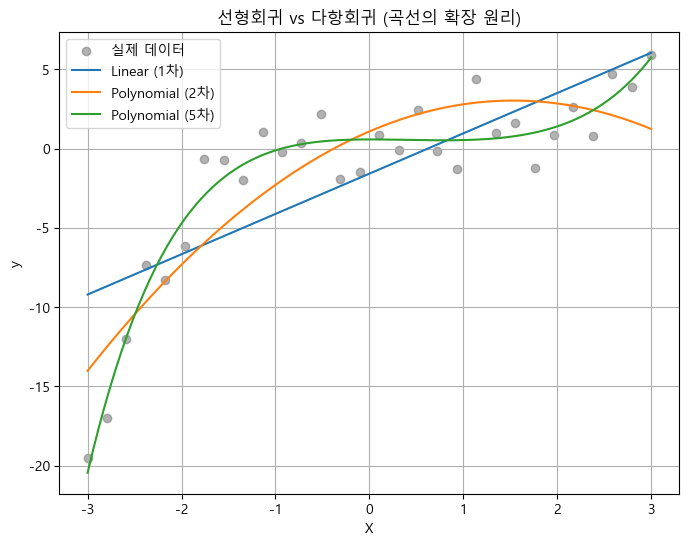

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# 1️⃣ 예시용 데이터 만들기 (곡선 형태)
np.random.seed(42)
X = np.linspace(-3, 3, 30).reshape(-1, 1)
y = 0.5 * X**3 - X**2 + 2 + np.random.randn(30, 1) * 2  # 일부러 곡선+노이즈

# 2️⃣ 세 가지 모델 정의
models = {
    "Linear (1차)": make_pipeline(PolynomialFeatures(degree=1), LinearRegression()),
    "Polynomial (2차)": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "Polynomial (5차)": make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
}

# 3️⃣ 예측용 데이터 (부드럽게 연결)
X_test = np.linspace(-3, 3, 200).reshape(-1, 1)

plt.figure(figsize=(8,6))
plt.scatter(X, y, color='gray', alpha=0.6, label='실제 데이터')

# 각 모델별 곡선 시각화
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X_test)
    plt.plot(X_test, y_pred, label=name)

plt.title("선형회귀 vs 다항회귀 (곡선의 확장 원리)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
